In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
hta_county = pd.read_csv("htaindex_data_counties_06.csv")
crime = pd.read_csv("crimes.csv")
school = pd.read_csv("new_district.csv")

In [6]:
hta_county["name"] = hta_county["name"].apply(lambda k: k[1:-1])
hta_county.head()

,county,name,blkgrps,population,households,land_acres,ht_ami,ht_80ami,ht_nmi,h_ami,...,emp_gravity,emp_ndx,block_size,intersection_density,avg_block_perimeter_meters,h_cost,median_smoc,median_gross_rent,pct_owner_occupied_hu,pct_renter_occupied_hu
0,"""06001""",Alameda,1046.0,1584983.0,558907.0,473018.82,46,55,67,29,...,49839,92,11,77,2729,2000,2101,1434,53,47
1,"""06003""",Alpine,2.0,1131.0,358.0,472525.15,74,90,74,42,...,639,79,938,1,5914,1837,2095,891,79,21
2,"""06005""",Amador,28.0,36995.0,13925.0,380529.00,60,73,63,33,...,2134,83,215,8,4710,1495,1540,879,76,24
3,"""06007""",Butte,195.0,222564.0,85318.0,1047336.14,64,75,53,34,...,8275,85,70,9,4555,1225,1239,865,59,41
4,"""06009""",Calaveras,30.0,44767.0,18060.0,652807.32,61,74,62,34,...,1701,83,279,7,4425,1491,1596,987,79,21


In [39]:
hta_county.columns

Index(['county', 'name', 'blkgrps', 'population', 'households', 'land_acres',
       'ht_ami', 'ht_80ami', 'ht_nmi', 'h_ami', 'h_80ami', 'h_nmi', 't_ami',
       't_80ami', 't_nmi', 'co2_per_hh_local', 'co2_per_acre_local',
       'autos_per_hh_ami', 'autos_per_hh_80ami', 'autos_per_hh_nmi',
       'vmt_per_hh_ami', 'vmt_per_hh_80ami', 'vmt_per_hh_nmi',
       'pct_transit_commuters_ami', 'pct_transit_commuters_80ami',
       'pct_transit_commuters_nmi', 't_cost_ami', 't_cost_80ami', 't_cost_nmi',
       'auto_ownership_cost_ami', 'auto_ownership_cost_80ami',
       'auto_ownership_cost_nmi', 'vmt_cost_ami', 'vmt_cost_80ami',
       'vmt_cost_nmi', 'transit_cost_ami', 'transit_cost_80ami',
       'transit_cost_nmi', 'transit_trips_ami', 'transit_trips_80ami',
       'transit_trips_nmi', 'compact_ndx', 'emp_ovrll_ndx', 'res_density',
       'gross_hh_density', 'hh_gravity', 'frac_sfd', 'emp_gravity', 'emp_ndx',
       'block_size', 'intersection_density', 'avg_block_perimeter_meters',
 

In [40]:
len(hta_county)

58

In [4]:
crime.head()

,Unnamed: 0,County,Violent_sum,Property_sum
0,0,Alameda,10127,59744
1,1,Alpine,6,34
2,2,Amador,92,669
3,3,Butte,790,7307
4,4,Calaveras,178,656


In [34]:
school_county = school.copy()
school_county['rank'] = school_county['rank'].apply(lambda k: int(k))

In [35]:
school_county = pd.merge(school_county, crime, on='County')[["Rank", "District", 'City', 'County', 'Rank score (2017)', 'Rank (2016)', 'rank', 'Violent_sum', 'Property_sum']]

In [57]:
max(school_county["rank"])

853

In [36]:
school_county.sort_values('Rank score (2017)', ascending = False, inplace = True)
school_county.head()

,Rank,District,City,County,Rank score (2017),Rank (2016),rank,Violent_sum,Property_sum
0,1st,Orinda Union Elementary,Orinda,Contra Costa,0.989,3.0,1,3895,28939
22,2nd,San Marino Unified,San Marino,Los Angeles,0.989,6.0,2,56351,252224
169,4th,Montecito Union Elementary,Santa Barbara,Santa Barbara,0.985,2.0,4,1527,9779
122,3rd,Rancho Santa Fe Elementary,Rancho Santa Fe,San Diego,0.985,10.0,3,10959,61356
23,5th,La Canada Unified,La Canada,Los Angeles,0.983,4.0,5,56351,252224


In [37]:
school_county["total_crimes"] = school_county.Violent_sum + school_county.Property_sum

In [85]:
everything = pd.merge(school_county, hta_county, left_on='County', right_on='name')[["District", 'City', 'County', 'rank', 'Violent_sum', 'Property_sum', 'population', 'households', 'median_gross_rent', 'h_cost', 't_cost_80ami', 'transit_cost_80ami']]
# everything["population"] =
everything.sort_values('rank') #.head()

,District,City,County,rank,Violent_sum,Property_sum,population,households,median_gross_rent,h_cost,t_cost_80ami,transit_cost_80ami
1093,Sierra-Plumas Joint Unified,Loyalton,Sierra,0,14,26,3021.0,1252.0,630,1525,14251,22
560,Coffee Creek Elementary,Trinity Center,Trinity,0,66,299,13373.0,5484.0,765,1150,12886,32
559,Trinity County Office Of Education,Weaverville,Trinity,0,66,299,13373.0,5484.0,765,1150,12886,32
558,Trinity Center Elementary,Trinity Center,Trinity,0,66,299,13373.0,5484.0,765,1150,12886,32
557,Trinity Alps Unified,Weaverville,Trinity,0,66,299,13373.0,5484.0,765,1150,12886,32
556,Lewiston Elementary,Lewiston,Trinity,0,66,299,13373.0,5484.0,765,1150,12886,32
553,Forty-Niner Regional Occupational Program,Auburn,Placer,0,622,7080,366280.0,135456.0,1320,1899,13205,15
552,Eureka Union,Granite Bay,Placer,0,622,7080,366280.0,135456.0,1320,1899,13205,15
551,Placer County Office Of Education,Auburn,Placer,0,622,7080,366280.0,135456.0,1320,1899,13205,15
550,Placer Hills Union Elementary,Meadow Vista,Placer,0,622,7080,366280.0,135456.0,1320,1899,13205,15


In [86]:
everything["District"] = everything["District"].apply(lambda k: k + " School District")
everything.head()

,District,City,County,rank,Violent_sum,Property_sum,population,households,median_gross_rent,h_cost,t_cost_80ami,transit_cost_80ami
0,Orinda Union Elementary School District,Orinda,Contra Costa,1,3895,28939,1096068.0,384646.0,1489,2169,13375,84
1,Moraga Elementary School District,Moraga,Contra Costa,12,3895,28939,1096068.0,384646.0,1489,2169,13375,84
2,Lafayette Elementary School District,Lafayette,Contra Costa,14,3895,28939,1096068.0,384646.0,1489,2169,13375,84
3,Acalanes Union High School District,Lafayette,Contra Costa,34,3895,28939,1096068.0,384646.0,1489,2169,13375,84
4,San Ramon Valley Unified School District,Danville,Contra Costa,46,3895,28939,1096068.0,384646.0,1489,2169,13375,84


In [52]:
print(min(everything["median_gross_rent"]), max(everything["median_gross_rent"]))

384 1749


In [83]:
print(min(everything["Property_sum"]), max(everything["Property_sum"]))

26 252224


In [53]:
print(min(everything["h_cost"]), max(everything["h_cost"]))

907 2579


In [61]:
print(min(everything["t_cost_80ami"]), max(everything["t_cost_80ami"]))

8417 16114


In [62]:
print(min(everything["transit_cost_80ami"]), max(everything["transit_cost_80ami"]))

0 1037


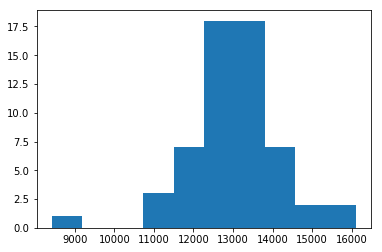

In [84]:
plt.hist(hta_county["t_cost_80ami"])#, bins = [50*i for i in range(10)])
plt.show()

In [80]:
len(everything["transit_cost_80ami"])

1094

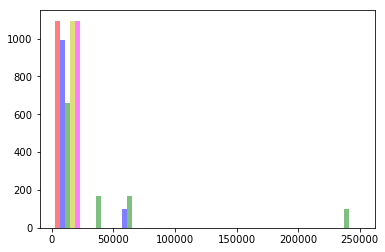

In [90]:
plt.hist([everything["rank"], everything["Violent_sum"], everything["Property_sum"], everything["median_gross_rent"], everything["t_cost_80ami"]], color=['r','b','g','y','magenta'], alpha=0.5)
plt.show()

In [209]:
c1, c2, c3, c4, c5 = 50, 10, 10, 20, 10000
normalize = lambda x: (x-min(x))/(max(x)-min(x))
f1 = lambda x: np.log10(c1 + x)
f2 = lambda x: np.log10(c2 + x)
f3 = lambda x: np.log10(c3 + x)
f4 = lambda x: np.log10(x + c4)
f5 = lambda x: np.log10(x + c5)

In [228]:
calculated = everything.copy()
#everything[['District', 'rank', 'Violent_sum', 'Property_sum', 'median_gross_rent', 't_cost_80ami']]
# calculated = hta_county[['median_gross_rent', 't_cost_80ami']]

calculated["rank_mod"] = calculated["rank"].apply(f1)
calculated["Violent_sum_mod"] = calculated["Violent_sum"].apply(f2)
calculated["Property_sum_mod"] = calculated["Property_sum"].apply(f3)
calculated["median_gross_rent_mod"] = calculated["median_gross_rent"].apply(f4)
calculated["t_cost_80ami_mod"] = calculated["t_cost_80ami"].apply(f5)
for col in ['rank_mod', 'Violent_sum_mod', 'Property_sum_mod', 'median_gross_rent_mod', 't_cost_80ami_mod']:
    calculated[col] = normalize(calculated[col])
calculated.head()

,District,City,County,rank,Violent_sum,Property_sum,population,households,median_gross_rent,h_cost,t_cost_80ami,transit_cost_80ami,rank_mod,Violent_sum_mod,Property_sum_mod,median_gross_rent_mod,t_cost_80ami_mod
0,Orinda Union Elementary School District,Orinda,Contra Costa,1,3895,28939,1096068.0,384646.0,1489,2169,13375,84,0.006843,0.673131,0.755514,0.892354,0.682688
1,Moraga Elementary School District,Moraga,Contra Costa,12,3895,28939,1096068.0,384646.0,1489,2169,13375,84,0.074338,0.673131,0.755514,0.892354,0.682688
2,Lafayette Elementary School District,Lafayette,Contra Costa,14,3895,28939,1096068.0,384646.0,1489,2169,13375,84,0.085310,0.673131,0.755514,0.892354,0.682688
3,Acalanes Union High School District,Lafayette,Contra Costa,34,3895,28939,1096068.0,384646.0,1489,2169,13375,84,0.179284,0.673131,0.755514,0.892354,0.682688
4,San Ramon Valley Unified School District,Danville,Contra Costa,46,3895,28939,1096068.0,384646.0,1489,2169,13375,84,0.225429,0.673131,0.755514,0.892354,0.682688


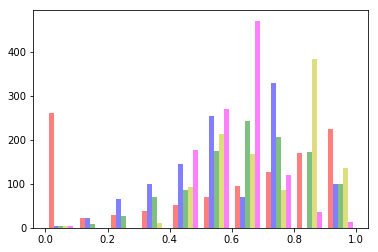

In [211]:
plt.hist([calculated["rank"], calculated["Violent_sum"], calculated["Property_sum"], calculated["median_gross_rent"], calculated["t_cost_80ami"]], color=['r','b','g','y','magenta'], alpha=0.5)
# plt.hist([calculated["median_gross_rent"], calculated["t_cost_80ami"]], color=['r','b'], alpha=0.5)

plt.show()

In [247]:
def account_for_rank_0(final, index):
    if calculated['rank'][index] == 0:
        return (10 - (160/79)*final)/10
    else:
        return final


calculated['final'] = (160/79) * calculated['rank_mod'] + (180/79) * calculated['Violent_sum_mod'] + (130/79) * calculated['Property_sum_mod'] + (200/79) * calculated['median_gross_rent_mod'] + (120/79) * calculated['t_cost_80ami_mod']
for i in range(len(calculated['rank'])):
    calculated['final'] = account_for_rank_0(calculated['final'][i], i)

# calculated["final"] = calculated['final'].apply(lambda k: (10 - (160/79)*k) if calculated['rank'] == 0 else  k)
calculated.sort_values('final')
#if rank = 0
    #final =  (10-160/79 * final)/10 

,District,City,County,rank,Violent_sum,Property_sum,population,households,median_gross_rent,h_cost,t_cost_80ami,transit_cost_80ami,rank_mod,Violent_sum_mod,Property_sum_mod,median_gross_rent_mod,t_cost_80ami_mod,final
0,Orinda Union Elementary School District,Orinda,Contra Costa,1,3895,28939,1096068.0,384646.0,1489,2169,13375,84,0.006843,0.673131,0.755514,0.892354,0.682688,0.831579
720,Rio Bravo-Greeley Union Elementary School Dist...,Bakersfield,Kern,466,5128,32570,865736.0,259700.0,969,1228,13096,27,0.806609,0.706731,0.768859,0.606248,0.648302,0.831579
721,Muroc Joint Unified School District,North Edwards,Kern,476,5128,32570,865736.0,259700.0,969,1228,13096,27,0.813242,0.706731,0.768859,0.606248,0.648302,0.831579
722,Lakeside Union School District,Bakersfield,Kern,488,5128,32570,865736.0,259700.0,969,1228,13096,27,0.821037,0.706731,0.768859,0.606248,0.648302,0.831579
723,Tehachapi Unified School District,Tehachapi,Kern,528,5128,32570,865736.0,259700.0,969,1228,13096,27,0.845821,0.706731,0.768859,0.606248,0.648302,0.831579
724,Gorman Joint School District,Gorman,Kern,564,5128,32570,865736.0,259700.0,969,1228,13096,27,0.866701,0.706731,0.768859,0.606248,0.648302,0.831579
725,Kern High School District,Bakersfield,Kern,573,5128,32570,865736.0,259700.0,969,1228,13096,27,0.871730,0.706731,0.768859,0.606248,0.648302,0.831579
726,Wasco Union High School District,Wasco,Kern,587,5128,32570,865736.0,259700.0,969,1228,13096,27,0.879409,0.706731,0.768859,0.606248,0.648302,0.831579
727,Maple Elementary School District,Shafter,Kern,645,5128,32570,865736.0,259700.0,969,1228,13096,27,0.909524,0.706731,0.768859,0.606248,0.648302,0.831579
728,Edison Elementary School District,Bakersfield,Kern,654,5128,32570,865736.0,259700.0,969,1228,13096,27,0.913970,0.706731,0.768859,0.606248,0.648302,0.831579


In [237]:
# aggregated[aggregated['City'].contains("")]
aggregated[aggregated["District"].apply(lambda k: "Ack" in k)].sort_values("City")

,level_0,index,District,City,County,rank,Violent_sum,Property_sum,population,households,...,h_cost,t_cost_80ami,transit_cost_80ami,rank_mod,Violent_sum_mod,Property_sum_mod,median_gross_rent_mod,t_cost_80ami_mod,final,new_rank
779,779,537,Ackerman Charter School District,Auburn,Placer,68,622,7080,366280.0,135456.0,...,1899,13205,15,0.296735,0.450144,0.596631,0.811922,0.661785,4.330834,7.120658


In [248]:
aggregated = calculated.sort_values('final').reset_index().reset_index()
#after final with correct calc with rank 0 counties

aggregated["new_rank"] = aggregated['level_0'] / len(aggregated) * 10
aggregated["new_rank"] = aggregated["new_rank"].apply(lambda k: 10 - k)
aggregated
# len(temp)

,level_0,index,District,City,County,rank,Violent_sum,Property_sum,population,households,...,h_cost,t_cost_80ami,transit_cost_80ami,rank_mod,Violent_sum_mod,Property_sum_mod,median_gross_rent_mod,t_cost_80ami_mod,final,new_rank
0,0,0,Orinda Union Elementary School District,Orinda,Contra Costa,1,3895,28939,1096068.0,384646.0,...,2169,13375,84,0.006843,0.673131,0.755514,0.892354,0.682688,0.831579,10.000000
1,1,720,Rio Bravo-Greeley Union Elementary School Dist...,Bakersfield,Kern,466,5128,32570,865736.0,259700.0,...,1228,13096,27,0.806609,0.706731,0.768859,0.606248,0.648302,0.831579,9.990859
2,2,721,Muroc Joint Unified School District,North Edwards,Kern,476,5128,32570,865736.0,259700.0,...,1228,13096,27,0.813242,0.706731,0.768859,0.606248,0.648302,0.831579,9.981718
3,3,722,Lakeside Union School District,Bakersfield,Kern,488,5128,32570,865736.0,259700.0,...,1228,13096,27,0.821037,0.706731,0.768859,0.606248,0.648302,0.831579,9.972578
4,4,723,Tehachapi Unified School District,Tehachapi,Kern,528,5128,32570,865736.0,259700.0,...,1228,13096,27,0.845821,0.706731,0.768859,0.606248,0.648302,0.831579,9.963437
5,5,724,Gorman Joint School District,Gorman,Kern,564,5128,32570,865736.0,259700.0,...,1228,13096,27,0.866701,0.706731,0.768859,0.606248,0.648302,0.831579,9.954296
6,6,725,Kern High School District,Bakersfield,Kern,573,5128,32570,865736.0,259700.0,...,1228,13096,27,0.871730,0.706731,0.768859,0.606248,0.648302,0.831579,9.945155
7,7,726,Wasco Union High School District,Wasco,Kern,587,5128,32570,865736.0,259700.0,...,1228,13096,27,0.879409,0.706731,0.768859,0.606248,0.648302,0.831579,9.936015
8,8,727,Maple Elementary School District,Shafter,Kern,645,5128,32570,865736.0,259700.0,...,1228,13096,27,0.909524,0.706731,0.768859,0.606248,0.648302,0.831579,9.926874
9,9,728,Edison Elementary School District,Bakersfield,Kern,654,5128,32570,865736.0,259700.0,...,1228,13096,27,0.913970,0.706731,0.768859,0.606248,0.648302,0.831579,9.917733


In [250]:
min(aggregated['Violent_sum_mod'])

0.0

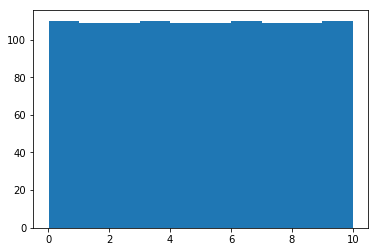

In [251]:
plt.hist(aggregated['new_rank'])
plt.show()

In [252]:
aggregated.to_csv("aggregated_schools.csv")

In [253]:
! ls

CACitiesSchools.csv
CADistrictSchools.csv
CAElementarySchool.csv
CAHighSchool.csv
CAMiddleSchool.csv
CA_Counties
CA_tract_school_district.js
CaliforniaElementarySchool.csv
CaliforniaHighSchool.csv
CaliforniaMiddleSchool.csv
Crimes_and_Clearances_with_Arson-1985-2016.csv
Leaflet.markercluster-1.3.0
README.md
aggregated_schools.csv
combined_data.ipynb
compare.csv
compare_w_diffs.csv
concat_education_data.ipynb
crimes.csv
crimes.ipynb
crimes.js
elementary.js
elementary_and_unified.js
everything_school.js
geopandas_experiment.ipynb
hta_ca.js
htaindex_data_counties_06.csv
index.html
index_crime.html
index_school.html
index_school_everything.html
myscript.js
myscript_crime.js
myscript_school.js
myscript_school_everything.js
new_district.csv
old_index_school.html
school_districts.js
style.css
temp
test.html
test2.html
test_index.html
updated_school_districts.js
updated_school_districts2.js
web_scraping_education_elementary.ipynb
